In [6]:
import pandas as pd
import re

In [7]:
df = pd.read_csv('../Data/data_cleaned_with_analysis.csv', sep=None, engine='python', encoding='utf-8-sig')
df.head()

,id,screen_name,name,created_at,full_text,hour,text_length,contains_engie,day,week,month,mentions_engie,tweet_critique,sentiment,sentiment_class
0,"1,72517E+18",gptournier,Guillaume Tournier,2023-11-16 15:13:18,ENGIEpartFR n6 mois dattente et tjs aucune ré...,15,282,True,2023-11-16,2023-11-13/2023-11-19,2023-11,1,False,NEGATIVE,Négatif
1,"1,72868E+18",jouanetwan,Jouan Etwan 💚💛,2023-11-26 07:34:34,"Bonjour ENGIEpartSAV , lappli monpilotageelec ...",7,155,True,2023-11-26,2023-11-20/2023-11-26,2023-11,1,False,NEGATIVE,Négatif
2,"1,73784E+18",vince_thouvenin,thouvenin,2023-12-21 14:27:08,ENGIEpartFR mon syndic de copropriété sergic...,14,219,True,2023-12-21,2023-12-18/2023-12-24,2023-12,1,True,NEGATIVE,Négatif
3,"1,74049E+18",BiduleAnatheme,Anathème Bidule,2023-12-28 21:32:58,ENGIEpartSAV vous envisagez de vous occuper de...,21,267,True,2023-12-28,2023-12-25/2023-12-31,2023-12,1,False,NEGATIVE,Négatif
4,"1,74068E+18",vince_thouvenin,thouvenin,2023-12-29 10:08:10,ENGIEpartSAV retour de votre technicien vous n...,10,240,True,2023-12-29,2023-12-25/2023-12-31,2023-12,1,False,NEGATIVE,Négatif


In [8]:
# from transformers import pipeline

# # Charger le pipeline d'analyse de sentiment
# sentiment_analyzer = pipeline("sentiment-analysis")

# # Appliquer l'analyse de sentiment à chaque tweet
# df['sentiment'] = df['full_text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# # Classer les tweets en catégories Positif, Négatif, Neutre
# df['sentiment_class'] = df['sentiment'].apply(lambda x: 'Positif' if x == 'POSITIVE' else ('Négatif' if x == 'NEGATIVE' else 'Neutre'))

# df.to_csv('../Data/data_cleaned_with_analysis.csv', index=False)

# # Analyser le sentiment avec des seuils
# def apply_sentiment_analysis(text):
#     result = sentiment_analyzer(text)[0]
#     sentiment_score = result['score']
    
#     # Si le score de sentiment positif est supérieur à un seuil, c'est positif, sinon négatif
#     if result['label'] == 'POSITIVE' and sentiment_score > 0.7:
#         return 'Positif'
#     elif result['label'] == 'NEGATIVE' and sentiment_score > 0.7:
#         return 'Négatif'
#     else:
#         return 'Neutre'

# df['sentiment_class'] = df['full_text'].apply(apply_sentiment_analysis)

# # Sauvegarder les résultats
# df.to_csv('../Data/data_cleaned_with_analysis.csv', index=False)

# # Affichage de la répartition des sentiments
# print(f"Positifs: {len(df[df['sentiment_class'] == 'Positif'])}")
# print(f"Négatifs: {len(df[df['sentiment_class'] == 'Négatif'])}")
# print(f"Neutres: {len(df[df['sentiment_class'] == 'Neutre'])}")



In [9]:
# from transformers import pipeline
# import pandas as pd

# # Charger le modèle de classification (ici, sentiment analysis comme exemple)
# nlp = pipeline("text-classification", model="distilbert-base-uncased")

# keywords = [
#     "délai", "panne", "urgence", "scandale", "problème", "erreur", "bug", "interruption",
#     "mauvais service", "incident", "disponibilité", "défaillance", "non-réponse", "injoignable",
#     "retard", "annulation", "indisponibilité", "difficulté", "absence", "injustifié", "non-résolu",
#     "échec", "dommages", "coût", "facturation", "prélèvement", "mauvaise communication", 
#     "impossible", "perte", "arnaque", "mécontentement", "désagrément", "mauvaise expérience", 
#     "déception", "insatisfaction", "service client", "délais", "rupture", "problèmes techniques", 
#     "absence de réponse", "non-gestion", "résolution", "garantie", "inefficacité", "défectueux", 
#     "manque d'information", "vol", "escroquerie", "mensonge", "non-remboursement", "insécurité",
#     "retour impossible", "rejet", "dépannage", "réclamation", "non-conforme", "mauvaise qualité",
#     "discrimination", "perte de connexion", "mauvaise gestion", "incapacité", "attente", "service déplorable",
#     "problème de connexion", "non-contrat", "fausses informations", "désactivation", "problème de facturation",
#     "mauvaise manipulation", "incompétence", "expérience négative", "irrespect", "non-respect", "injustices"
# ]


# # Charger les données de tweets dans un DataFrame
# df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')  # Remplace par le chemin de ton fichier CSV

# # Fonction pour détecter les tweets contenant les mots-clés critiques
# def detect_critical_keywords(tweet):
#     for keyword in keywords:
#         if keyword.lower() in tweet.lower():  # Recherche insensible à la casse
#             return True
#     return False

# # Appliquer la détection des mots-clés critiques
# df['contains_critical_keywords'] = df['full_text'].apply(detect_critical_keywords)

# # Filtrer les tweets qui contiennent des mots-clés critiques
# critical_tweets = df[df['contains_critical_keywords'] == True]

# # Sauvegarder les résultats
# df.to_csv('../Data/data_with_critical_keywords.csv', index=False)

# # Affichage des tweets contenant des mots-clés critiques
# print(f"Nombre de tweets avec mots-clés critiques : {len(critical_tweets)}")
# print(critical_tweets[['full_text']])  # Afficher les tweets critiques


In [ ]:
from transformers import pipeline
import pandas as pd

# Charger le modèle de classification (ici, sentiment analysis comme exemple)
nlp = pipeline("text-classification", model="distilbert-base-uncased")

# Liste des mots-clés critiques
keywords = [
    "délai", "panne", "urgence", "scandale", "problème", "erreur", "bug", "interruption",
    "mauvais service", "incident", "disponibilité", "défaillance", "non-réponse", "injoignable",
    "retard", "annulation", "indisponibilité", "difficulté", "absence", "injustifié", "non-résolu",
    "échec", "dommages", "coût", "facturation", "prélèvement", "mauvaise communication", 
    "impossible", "perte", "arnaque", "mécontentement", "désagrément", "mauvaise expérience", 
    "déception", "insatisfaction", "service client", "délais", "rupture", "problèmes techniques", 
    "absence de réponse", "non-gestion", "résolution", "garantie", "inefficacité", "défectueux", 
    "manque d'information", "vol", "escroquerie", "mensonge", "non-remboursement", "insécurité",
    "retour impossible", "rejet", "dépannage", "réclamation", "non-conforme", "mauvaise qualité",
    "discrimination", "perte de connexion", "mauvaise gestion", "incapacité", "attente", "service déplorable",
    "problème de connexion", "non-contrat", "fausses informations", "désactivation", "problème de facturation",
    "mauvaise manipulation", "incompétence", "expérience négative", "irrespect", "non-respect", "injustices"
]

# Charger les données de tweets dans un DataFrame
df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')  # Remplace par le chemin de ton fichier CSV

# Fonction pour détecter les tweets contenant des mots-clés critiques
def detect_critical_keywords(tweet):
    count = 0
    for keyword in keywords:
        if keyword.lower() in tweet.lower():  # Recherche insensible à la casse
            count += 1
    return count

# Fonction pour calculer le degré d'inconfort (score plus varié)
def calculate_discomfort(tweet):
    discomfort_score = 0
    
    # Compter combien de mots-clés critiques sont présents
    critical_count = detect_critical_keywords(tweet)
    
    # Le score augmente avec le nombre de mots-clés critiques
    discomfort_score += critical_count * 40  # Ajouter 10 points par mot-clé critique
    
    # Utiliser un modèle pour l'analyse de sentiment
    sentiment = nlp(tweet)
    sentiment_score = sentiment[0]['score']  # Récupérer le score du modèle de sentiment
    
    # Si le sentiment est négatif, augmenter le degré d'inconfort
    if sentiment[0]['label'] == 'NEGATIVE':
        discomfort_score += (sentiment_score * 30)  # Augmenter avec un facteur de 30 si négatif
    
    # Assurer que le score reste dans la plage [0, 100]
    discomfort_score = min(discomfort_score, 100)
    
    return discomfort_score

# Appliquer la détection des mots-clés critiques
df['urgence_status'] = df['full_text'].apply(lambda tweet: "Urgence" if detect_critical_keywords(tweet) > 0 else "Pas Urgence")

# Appliquer le calcul du degré d'inconfort
df['degree_of_discomfort'] = df['full_text'].apply(calculate_discomfort)

# Sauvegarder les résultats
df.to_csv('../Data/data_with_critical_keywords_and_discomfort.csv', index=False)

# Affichage des tweets avec leur statut d'urgence et le degré d'inconfort
critical_tweets = df[df['urgence_status'] == "Urgence"]
print(f"Nombre de tweets avec mots-clés critiques : {len(critical_tweets)}")
print(critical_tweets[['full_text', 'urgence_status', 'degree_of_discomfort']])  # Afficher les tweets, leur statut d'urgence et degré d'inconfort


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


Nombre de tweets avec mots-clés critiques : 137
                                             full_text urgence_status  \
0    ENGIEpartFR n6 mois dattente et tjs aucune ré...        Urgence   
1    Bonjour ENGIEpartSAV , lappli monpilotageelec ...        Urgence   
2    ENGIEpartFR mon syndic de copropriété sergic...        Urgence   
5    ENGIEpartFR Merci pour l'annulation d'entretie...        Urgence   
8    ENGIEpartFR Bonjour, J'ai reçu un courrier de...        Urgence   
..                                                 ...            ...   
556  Vrai ou Faux ?nLes garanties d'origine certifi...        Urgence   
562  Désolé mais le service client ENGIEpartFR il...        Urgence   
565  ENGIEnewsroom Quels dommages que des conseille...        Urgence   
573  ENGIEpartFR bonjour engie les voleurs ! Attent...        Urgence   
574  ENGIEpartFR vraiment des escrocs, des montants...        Urgence   

     degree_of_discomfort  
0                      80  
1                  

: 

C:\Users\rakot\AppData\Local\Temp\ipykernel_21964\904294506.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


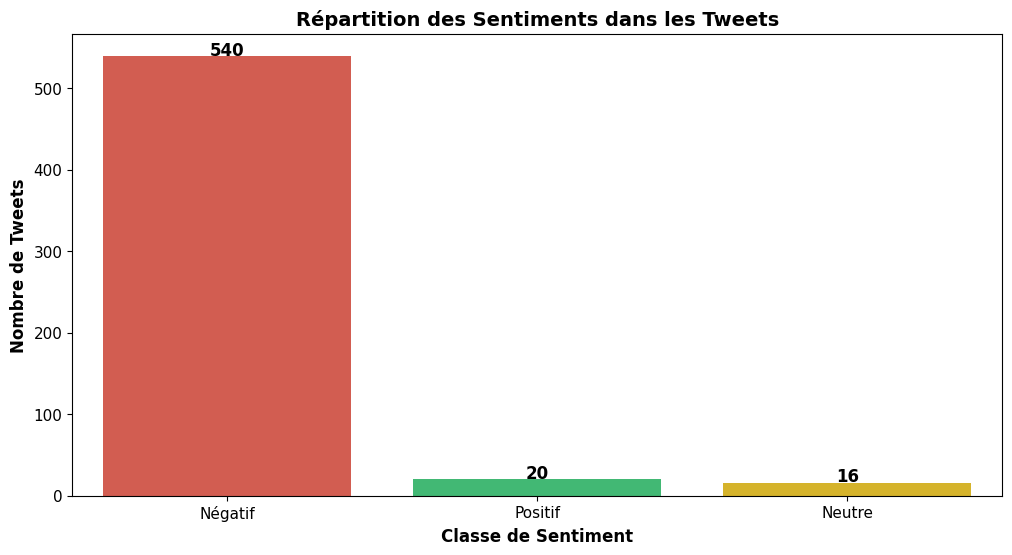

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("../Data/data_with_critical_keywords_and_discomfort.csv")

# Compter les occurrences de chaque classe de sentiment
sentiment_counts = df["sentiment_class"].value_counts()

# Définir une palette de couleurs pour chaque classe
colors = {"Positif": "#2ecc71", "Neutre": "#f1c40f", "Négatif": "#e74c3c"}

# Créer la figure avec une taille rectangulaire
plt.figure(figsize=(12, 6))  # Largeur plus grande que la hauteur pour un rectangle
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=[colors[s] for s in sentiment_counts.index]
)

# Ajouter des labels
plt.xlabel("Classe de Sentiment", fontsize=12, fontweight="bold")
plt.ylabel("Nombre de Tweets", fontsize=12, fontweight="bold")
plt.title("Répartition des Sentiments dans les Tweets", fontsize=14, fontweight="bold")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 1, str(v), ha="center", fontsize=12, fontweight="bold")

# Afficher le graphique
plt.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_21964\342947476.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


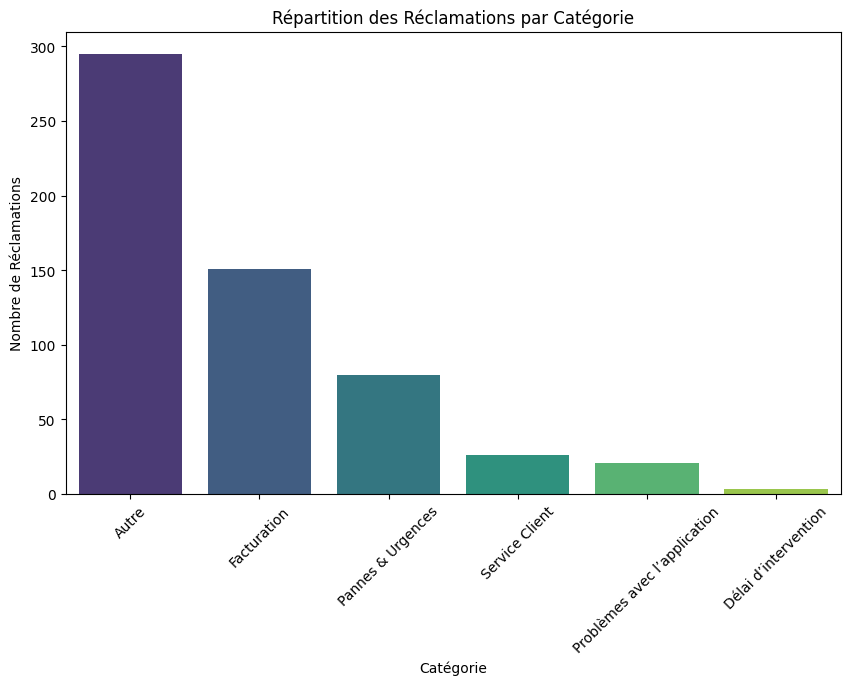

La plainte la plus fréquente est : Autre


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("../Data/data_with_critical_keywords_and_discomfort.csv")

# Fonction pour classer les plaintes
def classify_complaint(text):
    categories = {
        'Facturation': [
            'facture', 'prélèvement', 'erreur de facturation', 'prix', 'montant', 'comptabilité', 'paiement', 
            'surfacturation', 'frais supplémentaires', 'facturation incorrecte', 'facture erronée', 'dispute facture',
            'reçu', 'compte bancaire', 'pénalité', 'rabais', 'facture mensuelle', 'facture finale', 'facture supplémentaire'
        ],
        'Pannes & Urgences': [
            'panne', 'gaz', 'électricité', 'eau chaude', 'urgence', 'dépannage', 'incident', 'coupure', 
            'panne de courant', 'disfonctionnement', 'interruption', 'panne prolongée', 'perte de service', 'réparation urgente', 
            'problème technique', 'incident de service', 'panne d électricité', 'panne deau', 'coupure d eau chaude', 
            'urgence dépannage', 'incident grave', 'problème avec compteur'
        ],
        'Service Client': [
            'service client', 'réponse tardive', 'réponse inexistante', 'attente', 'manque de réactivité', 'incompétence', 
            'insatisfaction', 'délais de réponse', 'retour client', 'assistance', 'support client', 'réclamation', 'téléphone',
            'mauvaise expérience', 'manque d’informations', 'service nul', 'non-réponse', 'absence de solution', 'inutiles', 
            'réponse robotisée', 'impossible à joindre', 'réponse automatique', 'réponse non conforme', 'service médiocre'
        ],
        'Problèmes avec l’application': [
            'bug', 'application', 'service indisponible', 'erreur de chargement', 'application crash', 'problème d’interface',
            'problème technique', 'connexion', 'mauvais fonctionnement', 'application lente', 'plantage', 'problème d’accès',
            'écran blanc', 'dysfonctionnement', 'problème d’authentification', 'panne d’application', 'application gelée',
            'erreur système', 'problème d’interface utilisateur', 'connexion échouée', 'problème de synchronisation',
            'connexion perdue', 'problème serveur'
        ],
        'Délai d’intervention': [
            'retard', 'intervention', 'délai', 'attente prolongée', 'délai d’attente', 'problème de timing', 'délais trop long',
            'délai excessif', 'panne non résolue', 'pas d’intervention', 'attente interminable', 'retard intervention', 
            'intervention reportée', 'reparations en retard', 'absence de service', 'problème de disponibilité', 'service hors délai',
            'délai de réparation', 'report d’intervention', 'manque de disponibilité', 'planification ratée', 'délai anormal'
        ]
    }
    
    # Vérifier la présence des mots-clés dans le texte pour chaque catégorie
    for category, keywords in categories.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'Autre'

# Appliquer la classification des plaintes
df['categorie_plaintes'] = df['full_text'].apply(classify_complaint)

# Comptage des plaintes par catégorie
category_counts = df['categorie_plaintes'].value_counts()

# Affichage du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Répartition des Réclamations par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de Réclamations')
plt.xticks(rotation=45)
plt.show()

# Identifier la plainte la plus fréquente
most_frequent_complaint = category_counts.idxmax()
print(f"La plainte la plus fréquente est : {most_frequent_complaint}")

# Enregistrer les modifications dans le même fichier CSV
df.to_csv("../Data/data_with_critical_keywords_and_discomfort.csv", index=False)
